# Multiclass Image Classification

Muhammad Hasnan Ramadhan 2502396111

In [1]:
# Import Library
import os
from torchvision import datasets
import torchvision.transforms as transforms
import collections
from torchvision import utils
from torch.utils.data import DataLoader
from torchsummary import summary
from torch import nn
from torch import optim
import torch
import torchvision
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader, random_split, Dataset
from PIL import Image

In [2]:
# check device for cuda available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

## Data Preprocessing

In [3]:
class MultiLabelImageDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform, indices=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            img_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied on a sample.
            indices (list, optional): List of indices to use in the subset.
        """
        data = pd.read_csv(csv_file)
        if indices is not None:
            data = data.iloc[indices]
        self.classes = ["motorcycle, truck, train, bus, cycle, sitar, ektara, flutes, tabla, harmonium"]
        self.img_labels = data
        self.img_dir = img_dir
        self.transform = transform
        self.label_columns = self.img_labels.columns[2:]

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0].strip())
        image = Image.open(img_path).convert('RGB')
        labels = torch.tensor(self.img_labels.iloc[idx, 2:].values.astype(int))

        if self.transform:
            image = self.transform(image)

        return image, labels


In [4]:
data = pd.read_csv("D:\Magister Program\Master Computer Science\Semester 2\Deep Learning\FINAL EXAM\multilabel_class.csv")

In [5]:
data.shape

(7943, 12)

In [6]:
# Define transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomHorizontalFlip(),
    # transforms.CenterCrop(224),
    transforms.RandAugment(),                      
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.5, 0.5, 0.5])
])

In [7]:
# Set the random seed
np.random.seed(42)

# Load the full dataset
csv_file = "D:\Magister Program\Master Computer Science\Semester 2\Deep Learning\FINAL EXAM\multilabel_class.csv"
img_dir = "D:\Magister Program\Master Computer Science\Semester 2\Deep Learning\FINAL EXAM\images"
full_dataset = pd.read_csv(csv_file)

# Select 5000 random samples
subset_indices = np.random.choice(full_dataset.index, 7000, replace=False)

# Create the dataset instance
dataset = MultiLabelImageDataset(csv_file, img_dir, transform, indices=subset_indices)

In [8]:
dataset.label_columns       

Index(['motorcycle', 'truck', 'boat', 'bus', 'cycle', 'sitar', 'ektara',
       'flutes', 'tabla', 'harmonium'],
      dtype='object')

In [9]:
image, labels = dataset[0]  # Get the first sample

print("Image shape:", image.size)
print("Labels:", labels)

Image shape: <built-in method size of Tensor object at 0x000002BE343D56D0>
Labels: tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=torch.int32)


In [10]:
for i, (images, labels) in enumerate(dataset):
    if i >= 5:  # Stop after the first 5
        break
    print(f"Batch {i+1} Image tensor: {images[0].shape}")  # Adjust indexing for batch
    print(f"Batch {i+1} Label:", labels)

Batch 1 Image tensor: torch.Size([256, 256])
Batch 1 Label: tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=torch.int32)
Batch 2 Image tensor: torch.Size([256, 256])
Batch 2 Label: tensor([0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=torch.int32)
Batch 3 Image tensor: torch.Size([256, 256])
Batch 3 Label: tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=torch.int32)
Batch 4 Image tensor: torch.Size([256, 256])
Batch 4 Label: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=torch.int32)
Batch 5 Image tensor: torch.Size([256, 256])
Batch 5 Label: tensor([0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=torch.int32)


In [11]:
# from collections import defaultdict

# # Initialize a defaultdict to store label counts
# label_counts = defaultdict(int)

# # Iterate through the dataset to count labels
# for _, labels in dataset:
#     for label_idx, label_value in enumerate(labels):
#         if label_value.item() == 1:  # Assuming labels are binary (1 or 0)
#             label_counts[label_idx] += 1

# # Print label counts
# print("Label Counts:")
# for label_idx, count in label_counts.items():
#     print(f"Label {label_idx}: {count}")

In [12]:
# Define sizes for train, validation, and test sets
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size

# Split the dataset
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size], generator=torch.Generator().manual_seed(42))

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [13]:
from collections import defaultdict

# Initialize a defaultdict to store label counts
label_counts = defaultdict(int)

# Iterate through the dataset to count labels
for _, labels in train_dataset:
    for label_idx, label_value in enumerate(labels):
        if label_value.item() == 1:  # Assuming labels are binary (1 or 0)
            label_counts[label_idx] += 1

# Print label counts
print("Label Counts Training dataset:")
for label_idx, count in label_counts.items():
    print(f"Label {label_idx}: {count}")

Label Counts Training dataset:
Label 4: 1006
Label 8: 1059
Label 9: 426
Label 2: 1177
Label 1: 723
Label 3: 480
Label 0: 938
Label 6: 229
Label 5: 270
Label 7: 397


## Exploration

In [14]:
# Print sizes of each split
print(f'Train dataset size after split: {len(train_dataset)}')
print(f'Validation dataset size after split: {len(val_dataset)}')
print(f'Test dataset size after split: {len(test_dataset)}')

Train dataset size after split: 5600
Validation dataset size after split: 700
Test dataset size after split: 700


In [15]:
classes = ['motorcycle', 'truck', 'boat', 'bus', 'cycle', 'star', 'ekara', 'flutes', 'tabla', 'harmonium']

In [16]:
# def imshow(img):
#     img = img / 2 + 0.5
#     npimg = img.numpy()
#     plt.imshow(np.transpose(npimg, (1, 2, 0)))
#     plt.show()

# # To visualize some images and labels
# dataiter = iter(train_loader)
# images, labels = next(dataiter)
# imshow(torchvision.utils.make_grid(images))


# for idx, label in enumerate(labels):
#     present_classes = [classes[i] for i, is_present in enumerate(label) if is_present == 1]
#     print(f"Image {idx+1} has labels: {', '.join(present_classes)}")

## Modelling

In [17]:
from torchvision import models

vgg16 = models.vgg16(weights='IMAGENET1K_V1')

# Freeze the convolutional base to prevent updating weights during training
for param in vgg16.features.parameters():
    param.requires_grad = False

In [18]:
num_features = vgg16.classifier[6].in_features
num_classes = 10
vgg16.classifier[6] = torch.nn.Linear(num_features, num_classes)
vgg16 = vgg16.to(device)
optimizer = torch.optim.Adam(vgg16.parameters(), lr=0.0001)
loss_fn = nn.BCEWithLogitsLoss()

In [19]:
def calculate_accuracy(outputs, labels, threshold=0.7):
    probs = torch.sigmoid(outputs)
    preds = (probs > threshold).float()
    correct = (preds == labels).float()
    acc = correct.sum() / (labels.size(0) * labels.size(1))
    return acc


In [20]:
train_losses, val_losses, train_accs, val_accs = [], [], [], []

for epoch in range(5):  # loop over the dataset multiple times
    vgg16.train()
    running_loss, running_acc = 0.0, 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device).float()
        optimizer.zero_grad()
        outputs = vgg16(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        running_acc += calculate_accuracy(outputs, labels).item()  # Convert to scalar immediately if possible
    train_losses.append(running_loss / len(train_loader))
    train_accs.append(running_acc / len(train_loader))

    vgg16.eval()
    val_loss, val_acc = 0.0, 0.0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device).float()
            outputs = vgg16(inputs)
            loss = loss_fn(outputs, labels)
            val_loss += loss.item()
            val_acc += calculate_accuracy(outputs, labels).item()  # Convert to scalar immediately if possible

            preds = (torch.sigmoid(outputs) > 0.7).float()  # Threshold the outputs
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    val_losses.append(val_loss / len(val_loader))
    val_accs.append(val_acc / len(val_loader))

    print(f'Epoch {epoch + 1}, Train Loss: {train_losses[-1]:.3f}, Train Acc: {train_accs[-1]:.3f}, Val Loss: {val_losses[-1]:.3f}, Val Acc: {val_accs[-1]:.3f}')

Epoch 1, Train Loss: 0.084, Train Acc: 0.969, Val Loss: 0.046, Val Acc: 0.983
Epoch 2, Train Loss: 0.040, Train Acc: 0.984, Val Loss: 0.040, Val Acc: 0.989
Epoch 3, Train Loss: 0.036, Train Acc: 0.986, Val Loss: 0.034, Val Acc: 0.990
Epoch 4, Train Loss: 0.035, Train Acc: 0.987, Val Loss: 0.037, Val Acc: 0.990
Epoch 5, Train Loss: 0.028, Train Acc: 0.990, Val Loss: 0.041, Val Acc: 0.986


## Evaluation

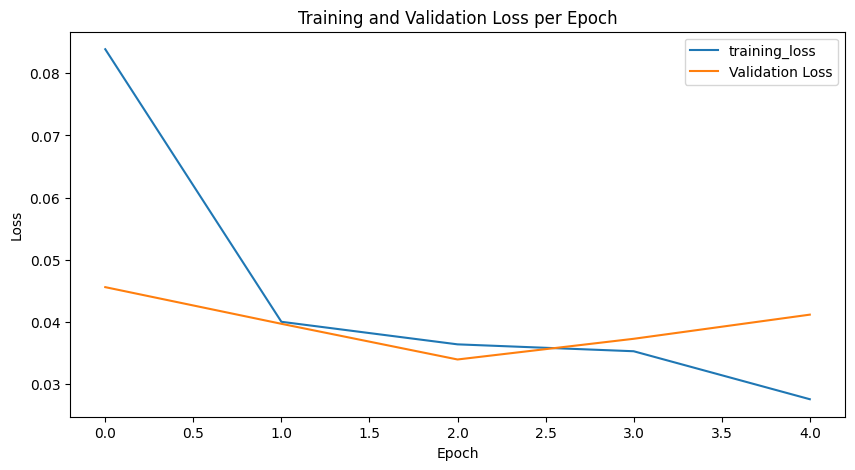

In [21]:
import matplotlib.pyplot as plt
# Plot training dan validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label = 'training_loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
def predict(image):
    input_tensor = transform(image).to(device)
    input_batch = input_tensor.unsqueeze(0)
    with torch.no_grad():
        output = vgg16(input_batch)
    probabilities = torch.sigmoid(output)
    threshold = 0.7
    preds = (probabilities > threshold).float()
    # Assuming `classes` is a list containing the class labels
    decoded_predictions = [classes[i] for i, pred in enumerate(preds[0]) if pred >= 0.7]
    return decoded_predictions


# Example usage
image = Image.open("D:\Magister Program\Master Computer Science\Semester 2\Deep Learning\FINAL EXAM\images\image1000.jpg")
predictions = predict(image)
print(predictions)


['motorcycle']


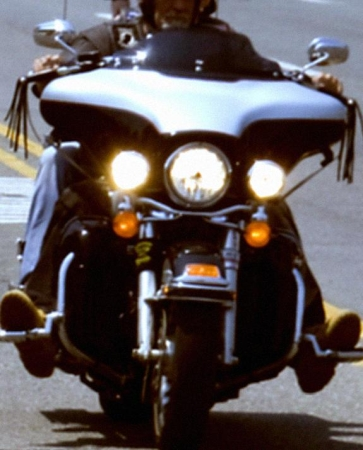

In [23]:
image

In [24]:
def predict_with_dataloader(test_dataloader, model, device, classes):
    model.eval()  # Set the model to evaluation mode
    all_predicted_classes = []
    all_predicted_probabilities = []

    with torch.no_grad():  # Disable gradient computation
        for images, _ in test_dataloader:  # Assuming labels are not needed for prediction
            images = images.to(device)
            outputs = model(images)
            probabilities = torch.sigmoid(outputs)  # Apply sigmoid to convert outputs to probabilities
            predicted_labels = (probabilities > 0.5).float()  # Apply threshold
            
            # Loop through each item in the batch
            for prob, labels in zip(probabilities, predicted_labels):
                # Extract classes and probabilities for predicted labels
                current_classes = [classes[i] for i, label in enumerate(labels) if label == 1]
                current_probs = [p.item() * 100 for p, l in zip(prob, labels) if l == 1]
                all_predicted_classes.append(current_classes)
                all_predicted_probabilities.append(current_probs)

    return all_predicted_classes, all_predicted_probabilities


In [25]:
# Assuming the test_dataloader, model, and device are already set up
predicted_classes, predicted_probabilities = predict_with_dataloader(test_loader, vgg16, device, classes)

# Print the predictions for checking
for i, (clss, probs) in enumerate(zip(predicted_classes, predicted_probabilities), start=1):
    print(f"Image {i}:")
    for cls, prob in zip(clss, probs):
        print(f"  Predicted class: {cls}, with probability: {prob:.2f}%")


Image 1:
  Predicted class: bus, with probability: 97.16%
Image 2:
  Predicted class: truck, with probability: 99.97%
Image 3:
  Predicted class: boat, with probability: 100.00%
Image 4:
  Predicted class: motorcycle, with probability: 99.65%
Image 5:
  Predicted class: tabla, with probability: 100.00%
Image 6:
  Predicted class: cycle, with probability: 100.00%
Image 7:
  Predicted class: cycle, with probability: 99.99%
Image 8:
  Predicted class: cycle, with probability: 100.00%
Image 9:
  Predicted class: cycle, with probability: 99.98%
Image 10:
  Predicted class: tabla, with probability: 100.00%
  Predicted class: harmonium, with probability: 100.00%
Image 11:
  Predicted class: truck, with probability: 100.00%
Image 12:
  Predicted class: bus, with probability: 99.97%
Image 13:
  Predicted class: boat, with probability: 100.00%
Image 14:
  Predicted class: truck, with probability: 99.82%
Image 15:
  Predicted class: star, with probability: 100.00%
  Predicted class: tabla, with p

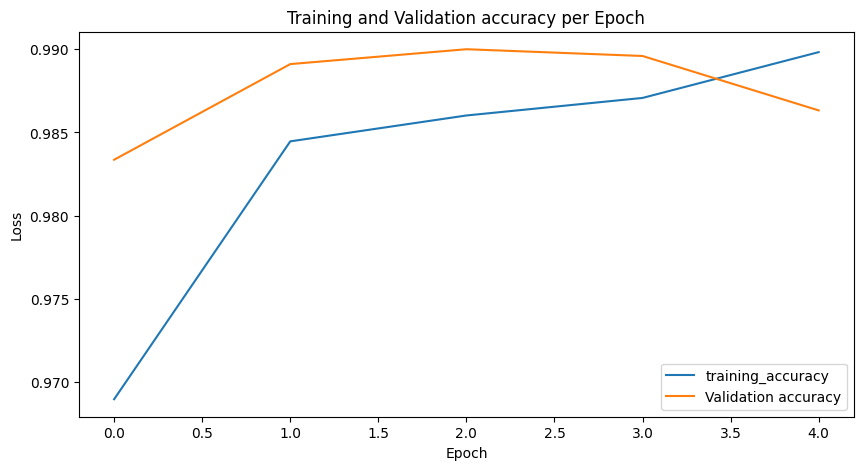

In [26]:
# Plot training dan validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_accs, label = 'training_accuracy')
plt.plot(val_accs, label='Validation accuracy')
plt.title('Training and Validation accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [27]:
import torch
from sklearn.metrics import hamming_loss

def calculate_hamming_loss(model, dataloader, device):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            predictions = torch.sigmoid(outputs) >= 0.7  
            predictions = predictions.to('cpu').numpy()
            labels = labels.to('cpu').numpy()
            
            all_preds.extend(predictions)
            all_labels.extend(labels)

    return hamming_loss(all_labels, all_preds)

In [28]:
# calculate hamming loss
loss = calculate_hamming_loss(vgg16, test_loader, device)
print("Computed Hamming Loss:", loss)

Computed Hamming Loss: 0.014285714285714285


In [29]:
import torch

def eval_with_dataloader(test_dataloader, model, device):
    model.eval()
    all_preds = []
    all_targets = []

    with torch.no_grad():
        for images, labels in test_dataloader:  # Now labels are also considered
            images = images.to(device)
            outputs = model(images)
            predictions = torch.sigmoid(outputs) > 0.5  # Get binary predictions
            all_preds.append(predictions.float())
            all_targets.append(labels.to(device))  # Ensure labels are on the same device

    all_preds = torch.cat(all_preds)
    all_targets = torch.cat(all_targets)
    return all_preds, all_targets


In [30]:
from torchmetrics.classification import MultilabelConfusionMatrix

preds, targets = eval_with_dataloader(test_loader, vgg16, device)
# Initialize the metric for the number of labels
num_labels = targets.shape[1]  
metric = MultilabelConfusionMatrix(num_labels=num_labels).to(device)

# Compute the confusion matrix
confusion_matrix = metric(preds,targets)
print(confusion_matrix)

tensor([[[588,   6],
         [  0, 106]],

        [[571,  28],
         [  1, 100]],

        [[534,   9],
         [  9, 148]],

        [[645,   2],
         [  8,  45]],

        [[572,   5],
         [  3, 120]],

        [[663,   2],
         [  1,  34]],

        [[666,   0],
         [  3,  31]],

        [[645,   1],
         [  1,  53]],

        [[572,   3],
         [  2, 123]],

        [[639,   1],
         [  2,  58]]], device='cuda:0')


In [31]:
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(cm, class_name):
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=['False', 'True'], yticklabels=['False', 'True'],
           title=f'Confusion Matrix for {class_name}',
           ylabel='True label',
           xlabel='Predicted label')

    # Loop over data dimensions and create text annotations.
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

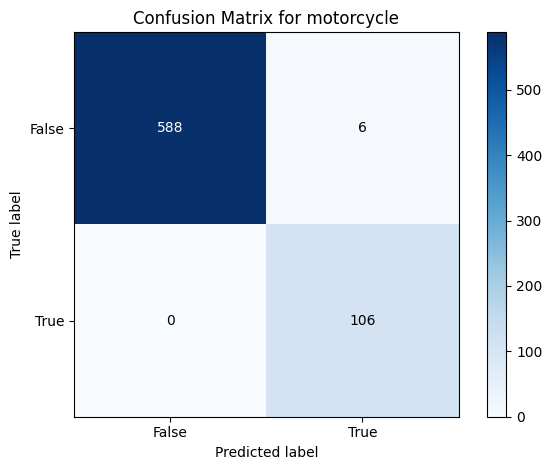

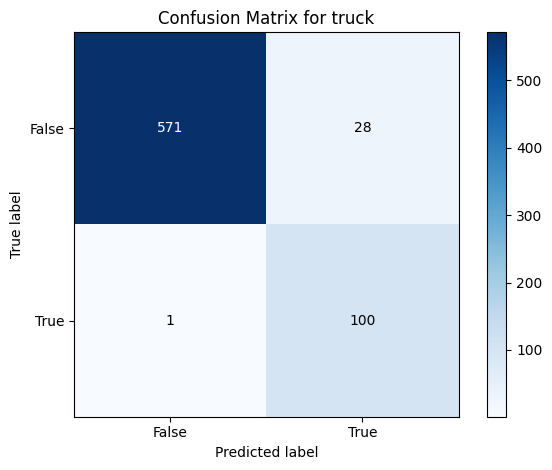

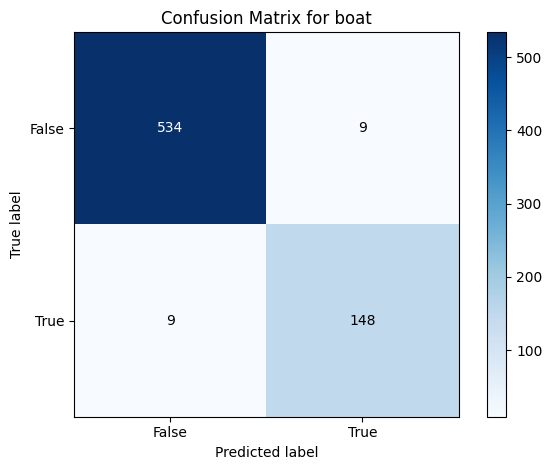

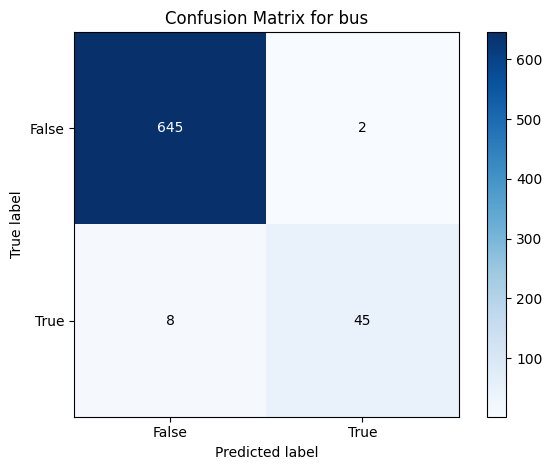

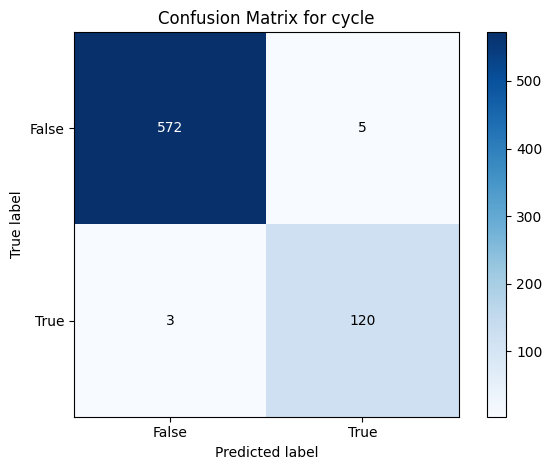

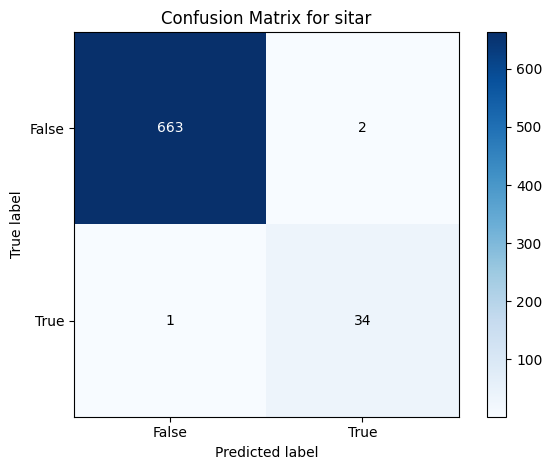

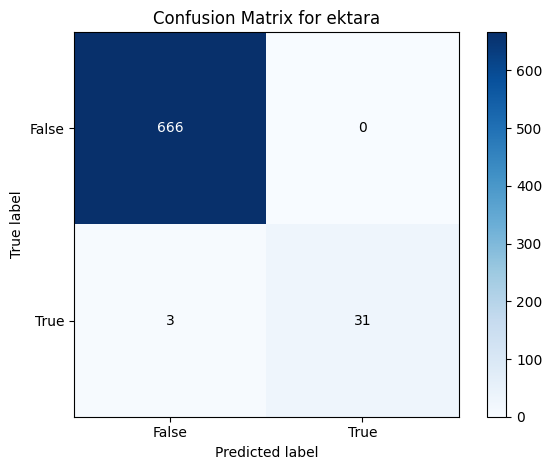

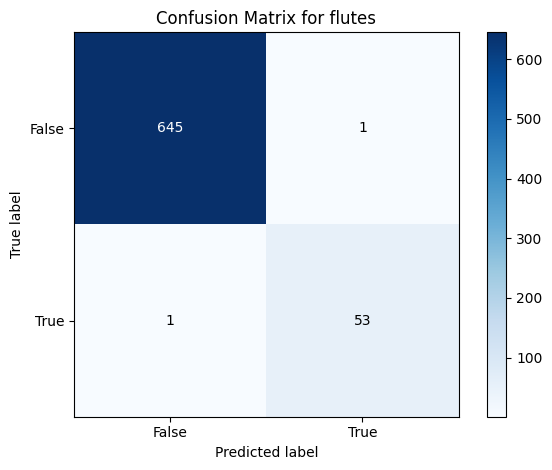

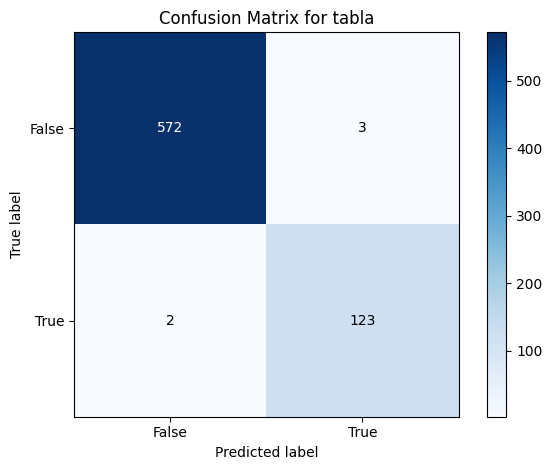

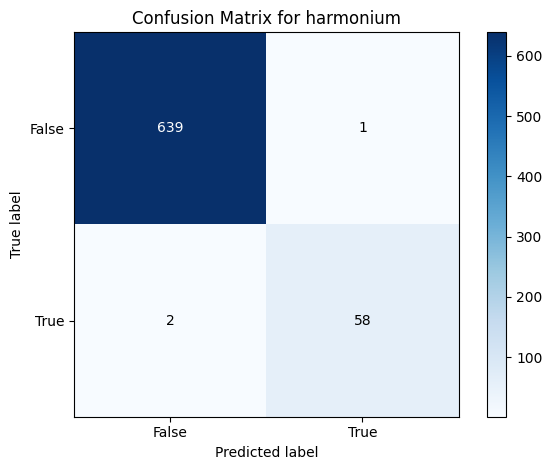

In [32]:
# Assuming 'confusion_matrix' is the result from the MultilabelConfusionMatrix metric
num_labels = confusion_matrix.shape[0]
labels = ['motorcycle', 'truck', 'boat', 'bus', 'cycle', 'sitar', 'ektara',
       'flutes', 'tabla', 'harmonium'] 

# Plot each confusion matrix
for i in range(num_labels):
    cm = confusion_matrix[i].cpu().numpy()  # Assuming the tensor is on a GPU, move it to CPU
    plot_confusion_matrix(cm, labels[i])

plt.show()

In [33]:
from torchmetrics import F1Score
import torch

# Initialize the metric
f1_score = F1Score(task="multiclass", num_classes=10).to(device)

# Assuming 'preds' and 'targets' are your model's predictions and true labels, respectively
# Ensure these are torch tensors; convert them if they are not
f1_scores = f1_score(preds, targets)

# Convert to numpy for easier handling in plotting
f1_scores = f1_scores.detach().cpu().numpy() 

In [35]:
f1_scores

array(0.9875714, dtype=float32)

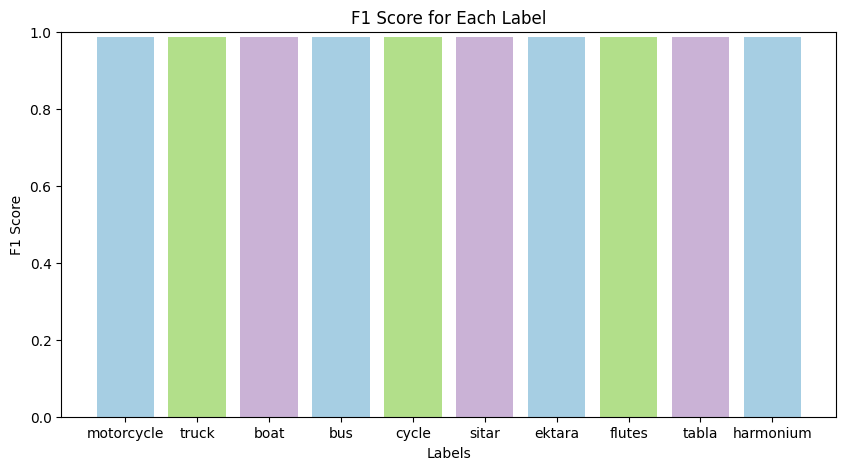

In [34]:
import matplotlib.pyplot as plt
colors = ['#a6cee3', '#b2df8a', '#cab2d6']

plt.figure(figsize=(10, 5))
plt.bar(labels, f1_scores, color=colors)
plt.xlabel('Labels')
plt.ylabel('F1 Score')
plt.title('F1 Score for Each Label')
plt.ylim([0, 1])  # F1 scores range from 0 to 1
plt.show()
